# Exploratory Data Analysis on Steroids


### Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import xlrd

### Import file

In [3]:
df = pd.read_excel("wbdata.xlsx")

### Describe dataset

In [4]:
df.head()

,country,population,surface,population.dens,national.income,national.income.cap,purchasing.power,purchasing.power.cap,gdp,gdp.cap
0,Afghanistan,37.2,652.9,57.0,20.3,550.00,73.0,1.96,1.0,-1.4
1,Albania,2.9,28.8,105.0,13.9,4.86,38.2,13.32,4.0,4.3
2,Algeria,42.2,2381.7,18.0,171.6,4.06,648.2,15.35,2.1,0.1
3,American Samoa,0.1,0.2,277.0,NaN,NaN,NaN,NaN,-5.4,-5.2
4,Andorra,0.1,0.5,164.0,NaN,NaN,NaN,NaN,1.6,1.6


In [5]:
df.describe()

,population,surface,population.dens,national.income,national.income.cap,purchasing.power,purchasing.power.cap,gdp,gdp.cap
count,214.000000,213.000000,212.000000,192.000000,192.000000,192.000000,192.000000,203.000000,203.000000
mean,35.362150,619.727230,140.310792,432.073958,96.600521,692.918229,34.363958,3.122167,1.824631
std,137.574451,1841.907686,162.206065,1850.957315,219.982037,2557.432311,104.031204,3.126563,3.100987
min,0.000000,0.000000,0.000000,0.100000,1.010000,0.100000,1.030000,-11.200000,-12.100000
25%,0.825000,11.000000,28.750000,8.400000,3.847500,20.475000,5.622500,1.500000,0.500000
50%,6.750000,93.000000,82.000000,35.400000,9.465000,74.350000,14.195000,3.000000,1.800000
75%,25.075000,447.400000,202.750000,211.475000,41.027500,356.175000,31.205000,4.850000,3.700000
max,1392.700000,17098.300000,861.000000,20562.600000,960.000000,25266.100000,900.000000,25.100000,24.300000


In [6]:
df.shape

(215, 10)

In [7]:
df.dtypes

country                  object
population              float64
surface                 float64
population.dens         float64
national.income         float64
national.income.cap     float64
purchasing.power        float64
purchasing.power.cap    float64
gdp                     float64
gdp.cap                 float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 10 columns):
country                 215 non-null object
population              214 non-null float64
surface                 213 non-null float64
population.dens         212 non-null float64
national.income         192 non-null float64
national.income.cap     192 non-null float64
purchasing.power        192 non-null float64
purchasing.power.cap    192 non-null float64
gdp                     203 non-null float64
gdp.cap                 203 non-null float64
dtypes: float64(9), object(1)
memory usage: 16.9+ KB


### Missing Values

In [9]:
print(df.isnull().values.any())

True


In [10]:
print(df.isnull().sum().sum())

122


In [53]:
print(df.isnull().sum())

country                  0
population               1
surface                  2
population.dens          3
national.income         23
national.income.cap     23
purchasing.power        23
purchasing.power.cap    23
gdp                     12
gdp.cap                 12
dtype: int64


* **Drop missing values**

In [12]:
df1 = df.copy()

In [13]:
df1.dropna(inplace=True)

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 214
Data columns (total 10 columns):
country                 188 non-null object
population              188 non-null float64
surface                 188 non-null float64
population.dens         188 non-null float64
national.income         188 non-null float64
national.income.cap     188 non-null float64
purchasing.power        188 non-null float64
purchasing.power.cap    188 non-null float64
gdp                     188 non-null float64
gdp.cap                 188 non-null float64
dtypes: float64(9), object(1)
memory usage: 21.2+ KB


In [15]:
df1.shape

(188, 10)

### Visualization

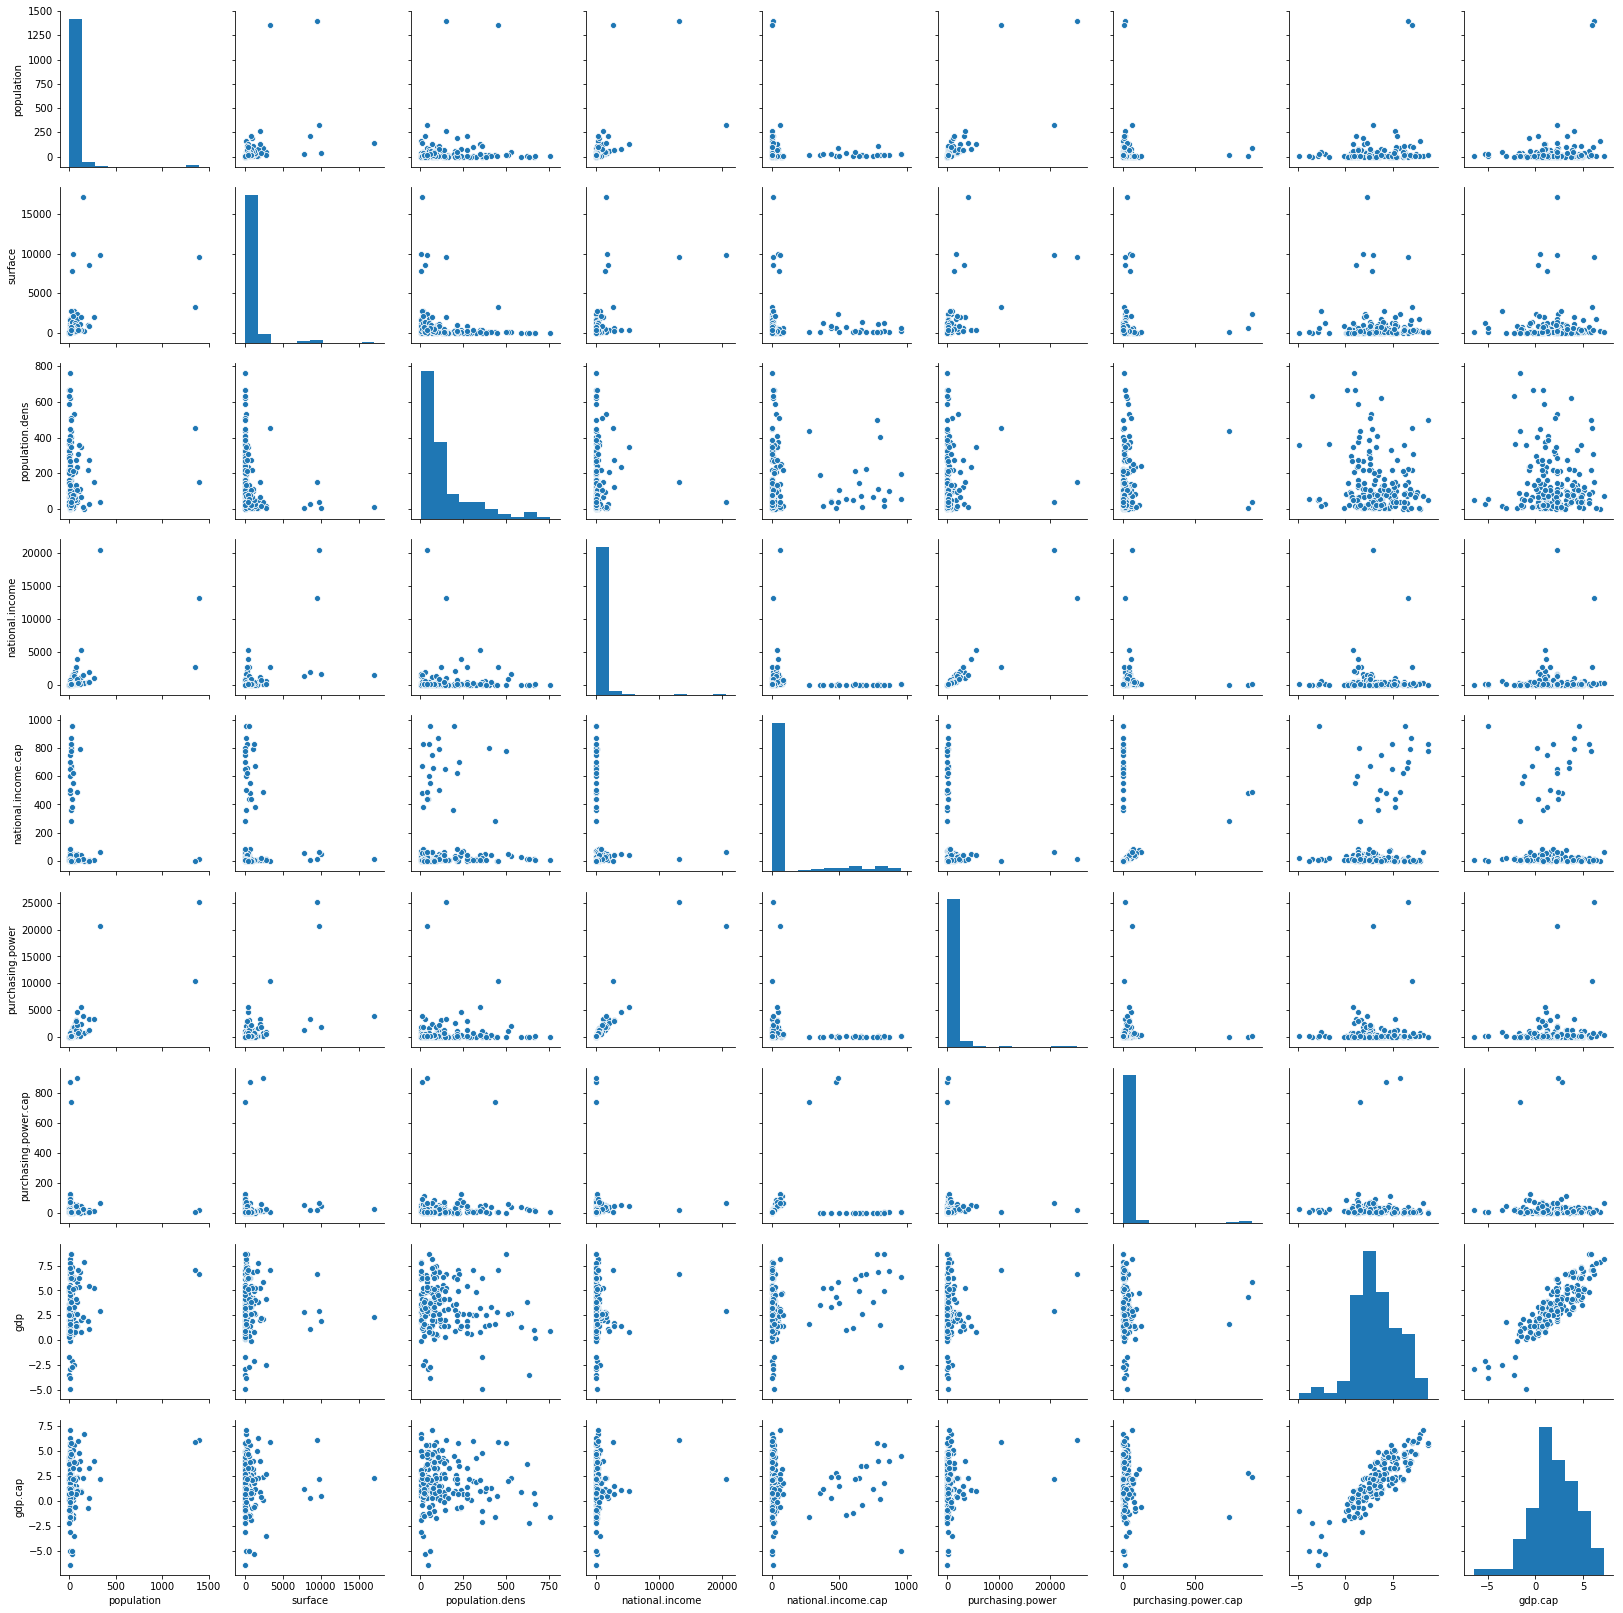

In [16]:
sns.pairplot(df1)

Text(0.5, 1.0, 'GDP')

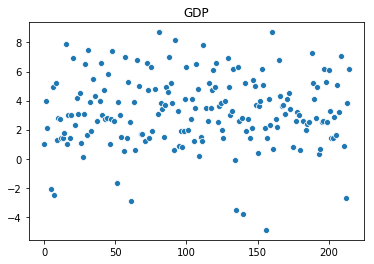

In [17]:
sns.scatterplot(data=df1['gdp']).set_title("GDP")

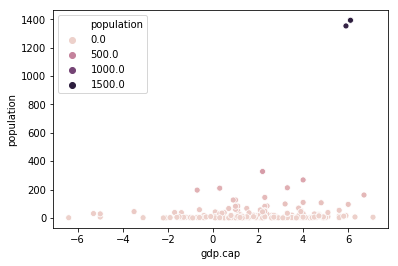

In [18]:
sns.scatterplot(x='gdp.cap', y='population', data=df1, hue='population')

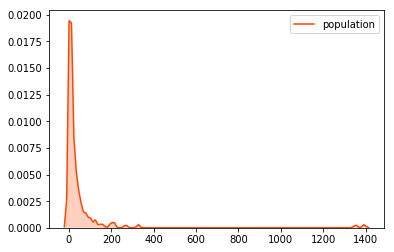

In [20]:
sns.kdeplot(df1['population'], shade=True, color='orangered')

population                 AxesSubplot(0.125,0.657941;0.227941x0.222059)
surface                 AxesSubplot(0.398529,0.657941;0.227941x0.222059)
population.dens         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
national.income            AxesSubplot(0.125,0.391471;0.227941x0.222059)
national.income.cap     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
purchasing.power        AxesSubplot(0.672059,0.391471;0.227941x0.222059)
purchasing.power.cap          AxesSubplot(0.125,0.125;0.227941x0.222059)
gdp                        AxesSubplot(0.398529,0.125;0.227941x0.222059)
gdp.cap                    AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

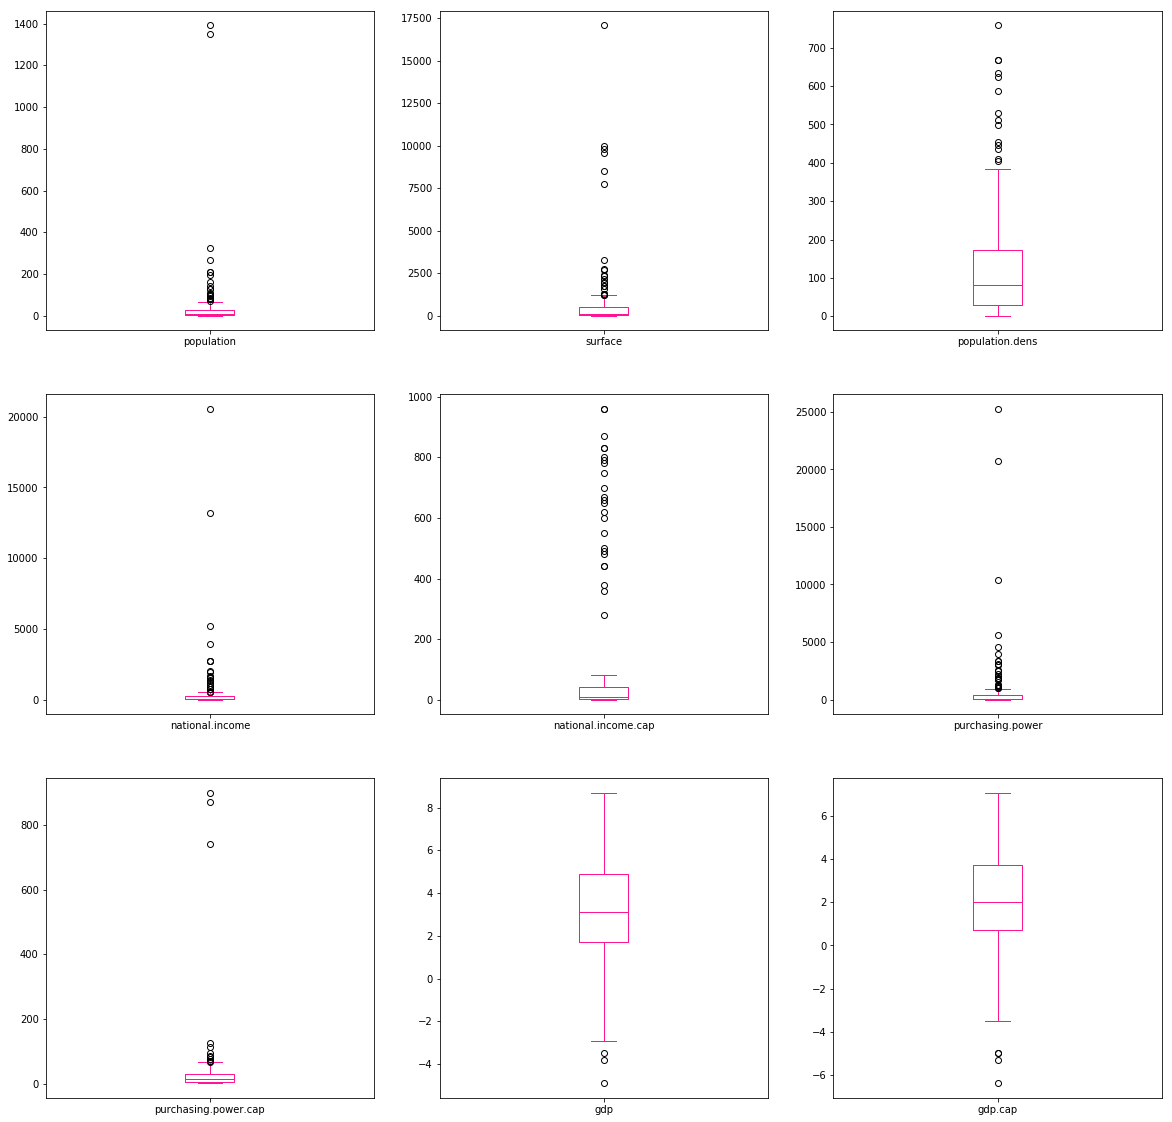

In [21]:
df1.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20, 20), color='deeppink')

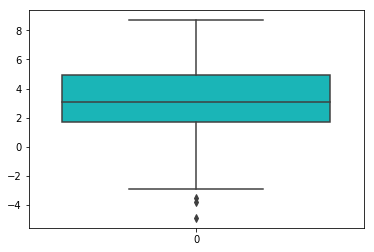

In [22]:
sns.boxplot(data=df1['gdp'], color='darkturquoise')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000148BC9AE518>,
      dtype=object)

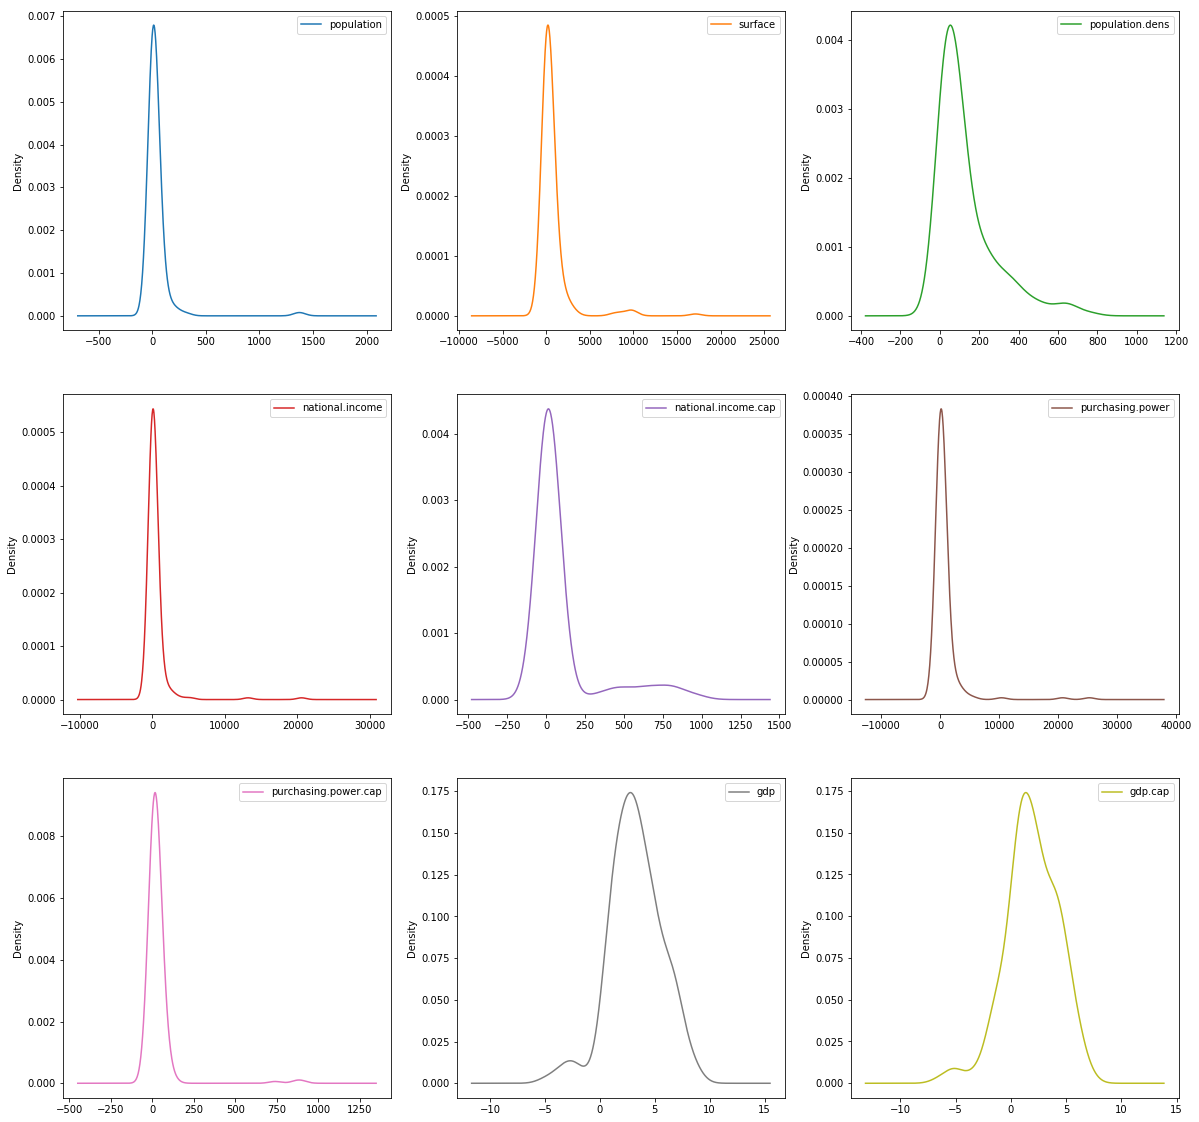

In [23]:
df1.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(20, 20))

### Correlation

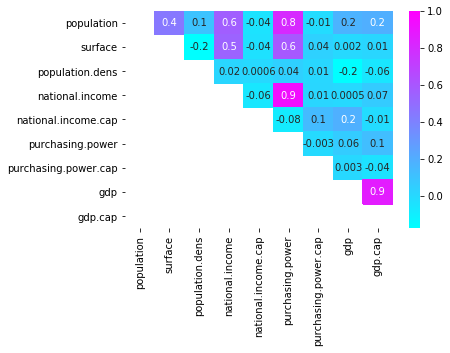

In [85]:
mask = np.tril(df1.corr())
sns.heatmap(df1.corr(), fmt='.1g', annot = True, cmap= 'cool', mask=mask)